## Logistic Regression

Logistic regression is basically a supervised classification algorithm.

Logistic regression models classifies the data using the sigmoid function.

![](logistic regression.png)
![](sigmoid.PNG)

### Cost Function
![](logistic_reg_cost.PNG)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

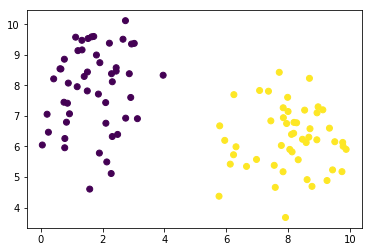

In [2]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=1.05,random_state=20)
#we need to add 1 to X values (bias)
X1 = np.c_[np.ones((X.shape[0])),X]

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.show()

In [3]:
#random weights
W=np.random.random(size=X1.shape[1])
W

array([0.74762233, 0.6290655 , 0.73143104])

In [4]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

In [5]:
def cost_function(predicted_y):
    
    error=(-y*np.log(predicted_y)) - ((1-y)*np.log(1-predicted_y))
    cf=(1/X1.shape[0])*sum(error)
    
    return cf,error

In [6]:
def gradient_descent(lrate,epochs):
    
    total_expected_error=float("inf")
    iteration=1
    for epoch in range(epochs):
        global W
        
        predictedY=sigmoid(X1.dot(W))
        total_error,error = cost_function(predictedY)
        
        print('Error at iteration ',iteration,'-',total_error)
        
        gradient=X1.T.dot(error)/X1.shape[0]
          
        if (total_expected_error<total_error):
            break
            
        total_expected_error=total_error
        
        for (i,w) in enumerate(gradient):
            W[i]+=float(-lrate)*w
        iteration+=1

In [7]:
gradient_descent(0.001,150)

Error at iteration  1 - 3.794826124989407
Error at iteration  2 - 3.666574674274018
Error at iteration  3 - 3.5426988769435073
Error at iteration  4 - 3.423054374963775
Error at iteration  5 - 3.3075021154982425
Error at iteration  6 - 3.1959081751276432
Error at iteration  7 - 3.088143583784588
Error at iteration  8 - 2.98408414782058
Error at iteration  9 - 2.883610271776064
Error at iteration  10 - 2.7866067785977786
Error at iteration  11 - 2.692962728236468
Error at iteration  12 - 2.602571234756236
Error at iteration  13 - 2.515329282287907
Error at iteration  14 - 2.43113754035456
Error at iteration  15 - 2.3499001792821828
Error at iteration  16 - 2.2715246865729677
Error at iteration  17 - 2.1959216852586545
Error at iteration  18 - 2.123004755358802
Error at iteration  19 - 2.0526902596409085
Error at iteration  20 - 1.984897174911373
Error at iteration  21 - 1.9195469300574926
Error at iteration  22 - 1.8565632520106017
Error at iteration  23 - 1.7958720207105154
Error at it

In [8]:
yhat=sigmoid(X1.dot(W)) # we get the probablities scores (between 0 and 1)

#if the score is above 0.5 lets make it 1 else make it 0
for i,v in enumerate(yhat):
    if v >=0.5: 
        yhat[i]=1
    else:
        yhat[i]=0

yhat.astype(int)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [9]:
#actual y
y  

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [10]:
#error and acuracy 
error=sum((yhat-y)**2)
print(error)
accuracy=1-(error/100)
accuracy

0.0


1.0

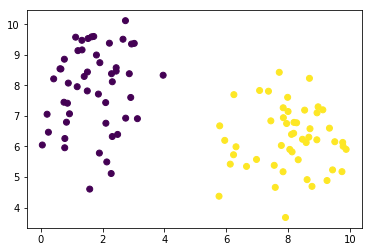

In [11]:
plt.scatter(X1[:,1],X1[:,2],marker='o',c=yhat)
plt.show()